# BELLABEAT CASE STUDY
### How can a Wellness Technology Company Play it Smart?

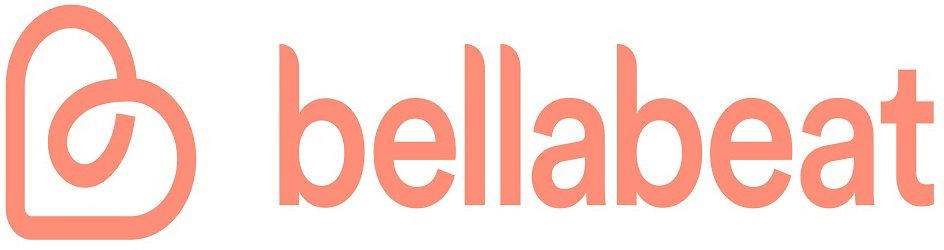

## Phase 1: ASK

#### 1.0 About the Company
Bellabeat is a high-tech company that manufactures health-focused smart products. Their technology informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits.  Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

#### 1.1 Business Task
Analyze FitBit Fitness Tracker data to gain insight into how consumers use their Fitbit devices and discover trends to help guide marketing strategy for Bellabeat.

#### 1.2 Business Objectives
* What are some trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

####  1.3 Key Stakeholders
* **Urška Sršen**: Bellabeat’s cofounder and Chief Creative Officer
* **Sando Mur**: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* **Bellabeat marketing analytics team**: A team of data analysts guiding Bellabeat’s marketing strategy

#### 1.4 Deliverables
* A clear summary of the business task
* A description of all data sources used
* Documentation of any cleaning or manipulation of data
* A summary of your analysis
* Supporting visualizations and key findings
* Your top high-level content recommendations based on your analysis

## Phase 2: PREPARE

#### 2.1 Data Source
* The dataset used in this project is the FitBit Fitness Tracker Data available on kaggle.
* According to the source, this dataset was generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016 and 05.12.2016. 
* Thirty eligible FitBit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. 
* The dataset contains information about physical activity, heart rate, daily activity, steps, and  sleep monitoring.

#### 2.2 Limitations
* Data only gathers information from 33 FitBit users, so the data does not represent all FitBit users.
* Data was collected in 2016. FitBit users activity level, hear rate, steps, and sleeping habits have likely changed.

#### 2.3 Is Data ROCCC?
Good data is ROCCC: Reliable, Orginal, Comprehensive, Current, and Cited
* **Reliable: No** - Data only has 33 respondents.
* **Original: No** - Data was provided by Amazon Mechanical Turk
* **Comprehensive: Yes** - FitBit Data matches the majority of Bellabeat products
* **Current: No** - Data is 6 years old
* **Cited: No** - Data was collected from at third party (Amazon Mecanical Turk)

## Phase 3: PROCESS

#### 3.1 Import Libraries
Pandas, numpy, and matplotlib are installed to read data.

In [73]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### 3.2 Import data
The file being used for this analysis is dailyActivity_merged.csv

In [41]:
# import data
daily_activity = pd.read_csv("mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")


#### Data cleaning and transformation
* Get an overview of data
* Check for data for errors, such as null or missing values
* Transform data so it can be analyzed

In [42]:
# Get an overview of the data
daily_activity.head()


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [43]:
# Look at the information of data
daily_activity.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [44]:
# Check for null and missing values
missing_values = daily_activity.isnull().sum()
print(missing_values)


Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [45]:
# Make sure dataset has 30 different IDs
unique_values = len(pd.unique(daily_activity['Id']))
print(unique_values)


33


#### After checking the data
* There is no null or missing values
* _ActivityDate_ is an object data type, so it will have to be converted to datetime 
* There are 940 rows and 14 columns
* The dataset contains 33 unique Ids but it is only supposed to contain 30

#### Transforming data
* Change _ActivityDate_ to datetime data type
* Convert the format of _ActivityDate_ to yyyy-mm-dd
* Create Weekday column for easier analysis
* Create a _TotalMinutes_ column by adding the Acitvity Minutes columns together
* Rename columns

In [48]:
# Change ActivityDate to datetime64 data type
daily_activity["ActivityDate"]  = pd.to_datetime(daily_activity["ActivityDate"], format = "%m/%d/%Y")

# Look at information
daily_activity.info()

# Get an overview of the data
daily_activity.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [58]:
# Rename daily_activity to df_activity
new_cols = ['Id', 'ActivityDate', 'WeekDay','TotalSteps', 'TotalDistance',
                'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance','SedentaryActiveDistance','VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes','SedentaryMinutes','Calories']

df_activity = daily_activity.reindex(columns=new_cols)

# Make sure the new column was added
df_activity.head()

,Id,ActivityDate,WeekDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


#### Create _WeekDay_ column for easier analysis

In [62]:
# Add a WeekDay column 
df_activity["WeekDay"] = df_activity["ActivityDate"].dt.day_name()

# Check to make sure the week days were added
df_activity["WeekDay"].head(7)


0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
5       Sunday
6       Monday
Name: WeekDay, dtype: object

#### Create _TotalMinutes_ column

In [65]:
# Create new column TotalMinutes by adding activity minutes
df_activity["TotalMinutes"] = df_activity["VeryActiveMinutes"] + df_activity["FairlyActiveMinutes"] + df_activity["LightlyActiveMinutes"] + df_activity["SedentaryMinutes"]
df_activity["TotalMinutes"].head()

0    1094
1    1033
2    1440
3     998
4    1040
Name: TotalMinutes, dtype: int64

#### Create _TotalHours_ column for easier analysis

In [68]:
# Create new column TotalHours by converting TotalMinutes column
df_activity["TotalHours"] = round(df_activity["TotalMinutes"] / 60)
df_activity["TotalHours"].head()


0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: TotalHours, dtype: float64

#### Data is now ready to be analyze

## Phase 4: ANALYZE

#### 4.1 Statistics
Looking at the statistics of df_activity for analysis
* mean
* standard deviation
* minimun and maxium
* percentiles
* count

In [69]:
df_activity.describe()


,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000


#### Analyzing the findings
* The average amount of steps is 7637
* On average most users walked a light active distance
* Most users logged sedentary minutes at 991 Minutes or 20 Hours per day
* Average amount of calories burned is 2303

## Phase 5: SHARE
#### Create Visualizations to communicate the findings

####  5.1 Data Visualization

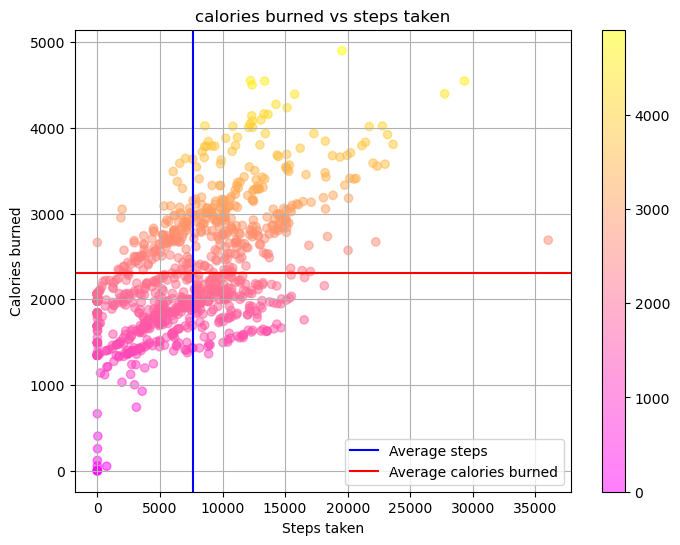

In [132]:
# Looking at Calories Burned vs Total Steps Taken

#plotting the scatterplot
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(df_activity.TotalSteps, df_activity.Calories, alpha = 0.5, c = df_activity.Calories, 
            cmap = "spring")

# Adding the average amount of steps and calories
avg_calories = 2303
avg_steps = 7637

plt.colorbar(orientation = "vertical")
plt.axvline(avg_steps, color = "Blue", label = "Average steps")
plt.axhline(avg_calories, color = "Red", label = "Average calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("calories burned vs steps taken")
plt.grid(True)
plt.legend()
plt.show()


#### Calories burned vs steps taken
* There is a positive correlation between the number of steps taken and the number of calories burned

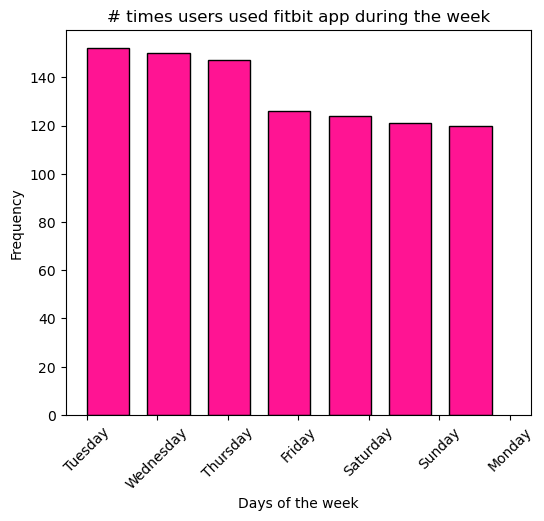

In [161]:
# Looking at the Frequency of FitBit usage 

#plotting the histogram
plt.figure(figsize=(6,5)) 
plt.hist(df_activity.WeekDay, bins = 7, 
         width = 0.6, color = "deeppink", edgecolor = "black")

# adding labels
plt.xlabel("Days of the week")
plt.xticks(rotation = 45)
plt.ylabel("Frequency")
plt.title("# times users used fitbit app during the week")
plt.show()


#### Number of times users used app 
* Frequency dropped on Friday through Monday
* Users log their activity more during the middle of the week

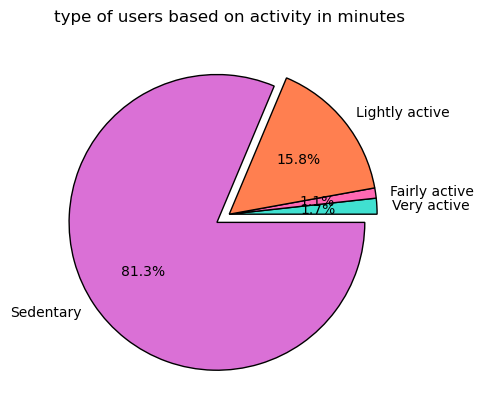

In [157]:
# Type of Users based on Activity in Minutes
VeryActiveMinutes = df_activity["VeryActiveMinutes"].sum()
FairlyActiveMinutes = df_activity["FairlyActiveMinutes"].sum()
LightlyActiveMinutes = df_activity["LightlyActiveMinutes"].sum()
SedentaryMinutes = df_activity["SedentaryMinutes"].sum()

#plotting pie chart
slices = [VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes]
labels = ["Very active", "Fairly active", "Lightly active", "Sedentary"]
colours = ["turquoise", "hotpink", "coral", "orchid"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%") 
plt.title("type of users based on activity in minutes")
#plt.tight_layout()
plt.show()


#### Types of users based on activity in minutes
* Most users are sedentary
* The FitBit app is not being used to track fitness hence the 1.7% very active users

## Phase 6: ACT

#### Delivering my insights and making recommendations based on the analysis

#### What are some trends in smart device usage?
* Most Users (81.3%) are using the FitBit app during sedentary activities and not using it to track fitness
* Users log their activity during the week more than the weekends
    * Maybe users are spending more time outside during the week and staying in on weekends.
    

#### How could these trends apply to Bellabeat customers?
* FitBit and Bellabeat could focus on creating products that inform women about their health and inspire them to be knowledgable about their own habits. The trends found on health, fitness, and habits can be applied to Bellabeat customers.

#### How could these trends help influence Bellabeat marketing strategy?

* To help motivate users, the Bellabeat app could send daily, weekly, monthly recaps regarding the total number of steps, burned calories, and total time spent on the different activity levels. The app could send motivation to users who are not meeting their goals and send applause to those who meet their goals.

* The users have an average of 7,638 steps which is below the CDC recommended 10,000 daily steps. Additionally, the analysis revealed that the average user spent 81.3% of their day being sedentary. Bellabeat could send notifications on its app to encourage users to stay active throughout the day. The notification could include how many steps the user has taken so far and give examples on activites they could do to be more active.